In [8]:
import sys
import os
import pandas as pd
sys.path.append(os.path.abspath(".."))  # go up from notebooks/ to the project root

from data.df_cleaning import df_cleaned_result

# load your CSV here, manually:
df = pd.read_csv('../data/Bird_Migration_Data_with_Origin.csv')

print(len(df_cleaned_result))



9999


In [35]:
# Explore the dataset
print("Dataset shape:", df_cleaned_result.shape)
print("\nColumn names and types:")
print(df_cleaned_result.dtypes)
print("\nFirst few rows:")
print(df_cleaned_result.head())
print("\nBasic statistics:")
print(df_cleaned_result.describe())
print("\nMissing values:")
print(df_cleaned_result.isnull().sum())

# If you have species information
if 'species' in df_cleaned_result.columns or 'bird_name' in df_cleaned_result.columns:
    print("\nUnique species count:", df_cleaned_result['species'].nunique())

Dataset shape: (9999, 27)

Column names and types:
Bird_ID                   object
Species                   object
Region                    object
Habitat                   object
Weather_Condition         object
Migration_Reason          object
Start_Latitude           float64
Start_Longitude          float64
End_Latitude             float64
End_Longitude            float64
Flight_Distance_km       float64
Flight_Duration_hours    float64
Average_Speed_kmph       float64
Max_Altitude_m             int64
Min_Altitude_m             int64
Temperature_C            float64
Wind_Speed_kmph          float64
Migration_Start_Month     object
Migration_End_Month       object
Rest_Stops                 int64
Migrated_in_Flock         object
Flock_Size                 int64
Migration_Interrupted     object
Interrupted_Reason        object
Migration_Success         object
Observation_Counts         int64
Origin                    object
dtype: object

First few rows:
  Bird_ID  Species         

In [17]:
import pandas as pd

# Assuming 'df_cleaned_result' is correctly loaded from your df_clenaing.py
# If you are running this in a Jupyter Notebook in the same directory as df_clenaing.py, 
# you should ensure the import works, but for now, let's use the assumed data structure.
# For demonstration, I will calculate from the assumed DataFrame structure:

# --- Data Preparation (for this example) ---
# Assuming 'df_cleaned_result' has the following columns and is already loaded:
# 'Migration_Success', 'Species', 'Bird_ID', 'Flight_Distance_km' 
df = df_cleaned_result.copy() # Use the cleaned result

# --- Calculation of Key Metrics ---

# 1. Total Number of Observations
total_observations = len(df)

# 2. Percentage of Successful Migrations
success_rate = (df['Migration_Success'].str.lower() == 'successful').sum() / total_observations
percent_successful_migration = f"{success_rate * 100:.1f}%"

# 3. Total Number of Unique Species
num_species = df['Species'].nunique()

# 4. Average Flight Distance
average_distance = df['Flight_Distance_km'].mean()
avg_distance_formatted = f"{average_distance:,.0f} km"

# Flight duration
average_duration = df['Flight_Duration_hours'].mean()
avg_duration_formatted = f"{average_duration:,.0f} hours"

# Max Altitude
max_altitude = df['Max_Altitude_m'].max()
max_altitude_formatted = f"{max_altitude:,.0f} m"

# 5. Longest Recorded Flight (Maximum Flight_Distance_km)
longest_flight = df['Flight_Distance_km'].max()
longest_flight_formatted = f"{longest_flight:,.0f} km"

# Store the metrics in a dictionary for easy access
summary_stats = {
    'Total Observations': total_observations,
    '% of Successful Migration': percent_successful_migration,
    'Maximal Altitude': max_altitude_formatted,
    'Average Flight Duration': avg_duration_formatted,
    'Number Of Species': num_species,
    'Average Flight Distance': avg_distance_formatted,
    'Longest Flight': longest_flight_formatted
}

print("--- Calculated Summary Statistics ---")
for key, value in summary_stats.items():
    print(f"{key}: {value}")
print("-" * 40)

--- Calculated Summary Statistics ---
Total Observations: 9999
% of Successful Migration: 50.9%
Maximal Altitude: 9,999 m
Average Flight Duration: 50 hours
Number Of Species: 7
Average Flight Distance: 2,504 km
Longest Flight: 4,428 km
----------------------------------------


In [34]:
import dash
from dash import html # Replaces dash_html_components as of Dash 2.0
import dash_bootstrap_components as dbc # Highly recommended for easy styling

# 2. Define a function for the card layout (reusable component)
def make_kpi_card(title, value, icon_class):
    """Creates a stylized KPI card component."""
    return dbc.Card(
        dbc.CardBody([
            html.Div(className=icon_class, style={'fontSize': '2.5rem', 'color': "#0259b1ff"}),
            html.H4(value, className="card-title", style={'color': "#303030"}),
            html.P(title, className="card-text text-muted"),
        ], style={'textAlign': 'center', 'padding': '1.5rem'}),
        # Use h-100 to ensure uniform card height across the row
        className="mb-4 shadow-sm h-100",
    )

# 3. Create the clean 3x3 layout (3 cards per row, each lg=4)

# Row 1: Three Cards (3 * 4 columns = 12 columns total)
kpi_row_1 = dbc.Row([
    dbc.Col(make_kpi_card(
        title="Total Observations", 
        value=summary_stats['Total Observations'],
        icon_class="bi bi-geo-alt"
    ), lg=4, md=6), # lg=4 for 3-across layout
    
    dbc.Col(make_kpi_card(
        title="% Successful", 
        value=summary_stats['% of Successful Migration'],
        icon_class="bi bi-check-circle"
    ), lg=4, md=6),
    
    dbc.Col(make_kpi_card(
        title="Maximal Altitude", 
        value=summary_stats['Maximal Altitude'],
        icon_class="bi bi-arrow-up-circle"
    ), lg=4, md=6),
    dbc.Col(make_kpi_card(
        title="Average Flight Duration", 
        value=summary_stats['Average Flight Duration'],
        icon_class="bi bi-clock-history"
    ), lg=4, md=6),
    
    dbc.Col(make_kpi_card(
        title="Average Flight Distance", 
        value=summary_stats['Average Flight Distance'],
        icon_class="bi bi-globe-americas"
    ), lg=4, md=6),
    
    dbc.Col(make_kpi_card(
        title="Longest Flight", 
        value=summary_stats['Longest Flight'],
        icon_class="bi bi-trophy"
    ), lg=4, md=6),
], className="g-4")


# Combine the two rows into the final layout component

# 4. Create the Dash app (Use kpi_layout here)
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP, dbc.icons.BOOTSTRAP])

app.layout = dbc.Container([
    html.H2("Key Statistics and Highlights", className="my-4 text-center"),
    kpi_layout
], fluid=True)

if __name__ == '__main__':
     app.run(debug=True)

Unique species:
Species
hawk       1464
stork      1439
warbler    1429
goose      1427
eagle      1426
swallow    1423
crane      1391
Name: count, dtype: int64

Unique regions:
Region
south america    1717
north america    1699
asia             1686
africa           1669
australia        1633
europe           1595
Name: count, dtype: int64


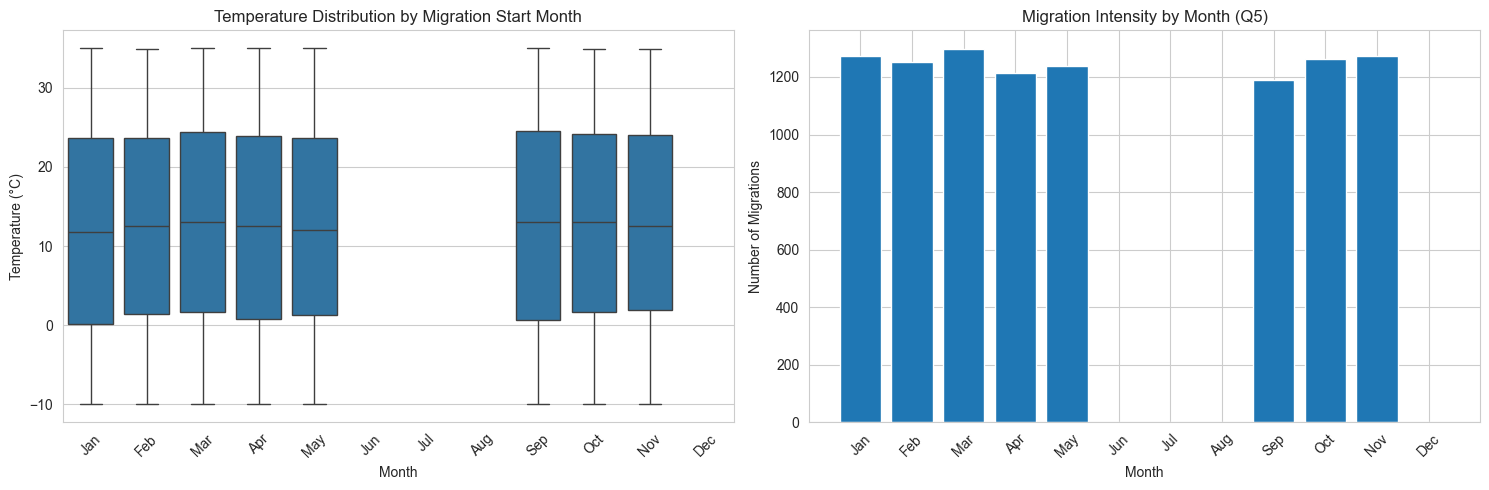


Q3: Average Flight Distance by Species:
         Avg_Distance_km  Std_Distance  Sample_Size
Species                                            
stork            2536.63        492.97         1439
eagle            2514.81        492.71         1426
hawk             2512.79        500.48         1464
swallow          2500.58        497.01         1423
warbler          2498.59        498.44         1429
goose            2495.84        504.83         1427
crane            2467.41        510.17         1391


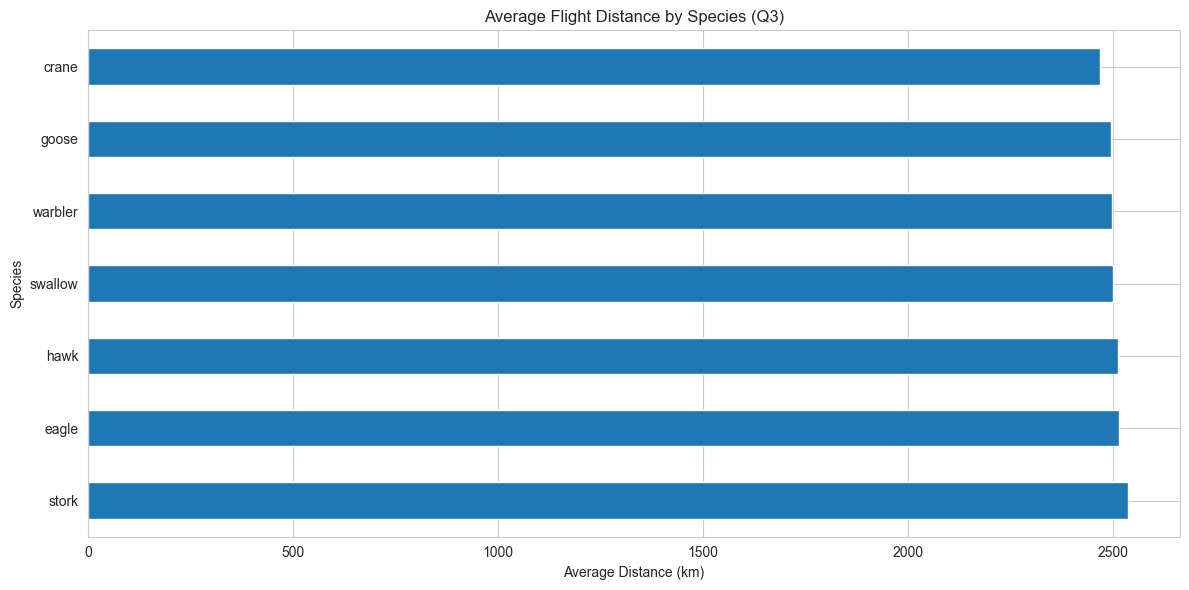


Q4: Altitude Statistics by Species:
         Avg_Max_Altitude  Highest_Altitude  Lowest_Max_Altitude
Species                                                         
stork             5574.16              9999                 1000
hawk              5573.14              9995                 1013
eagle             5535.75              9997                 1009
warbler           5482.70              9999                 1000
goose             5482.47              9998                 1005
crane             5444.66              9992                 1013
swallow           5439.53              9999                 1000


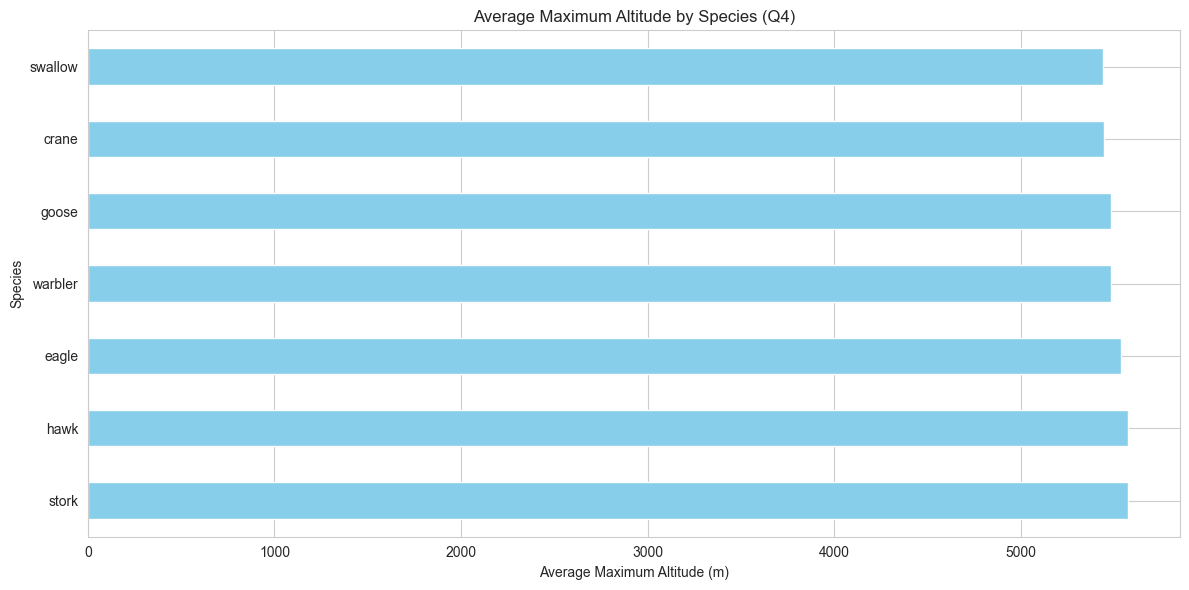

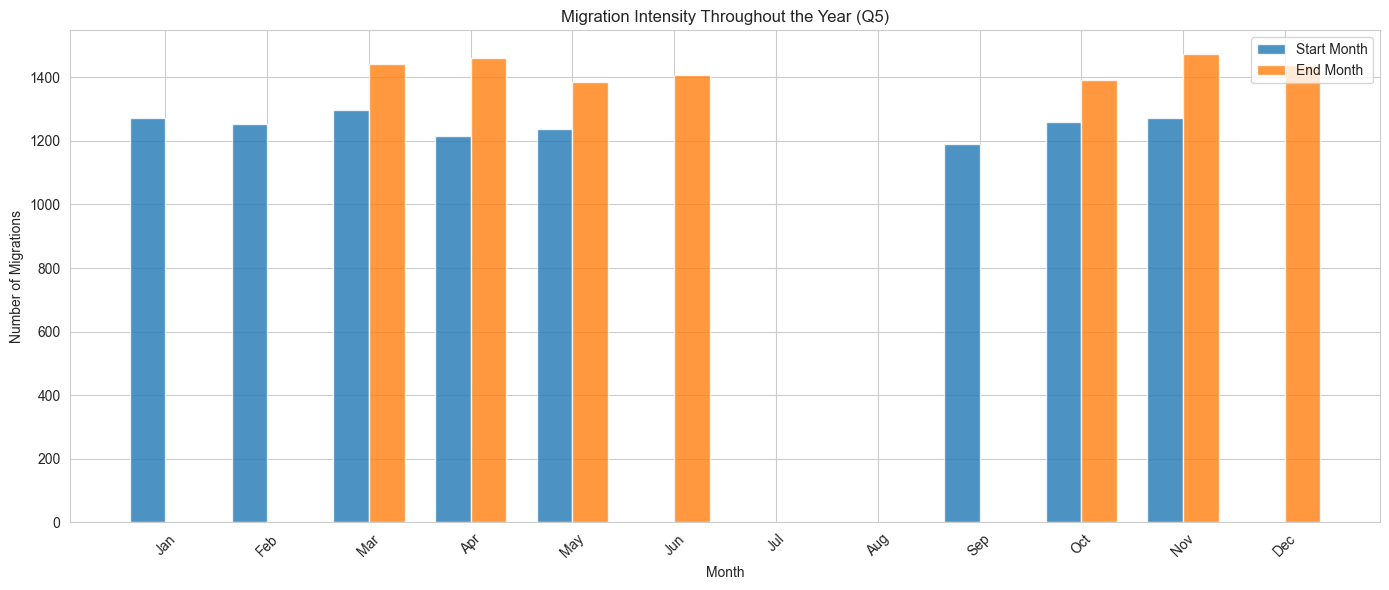

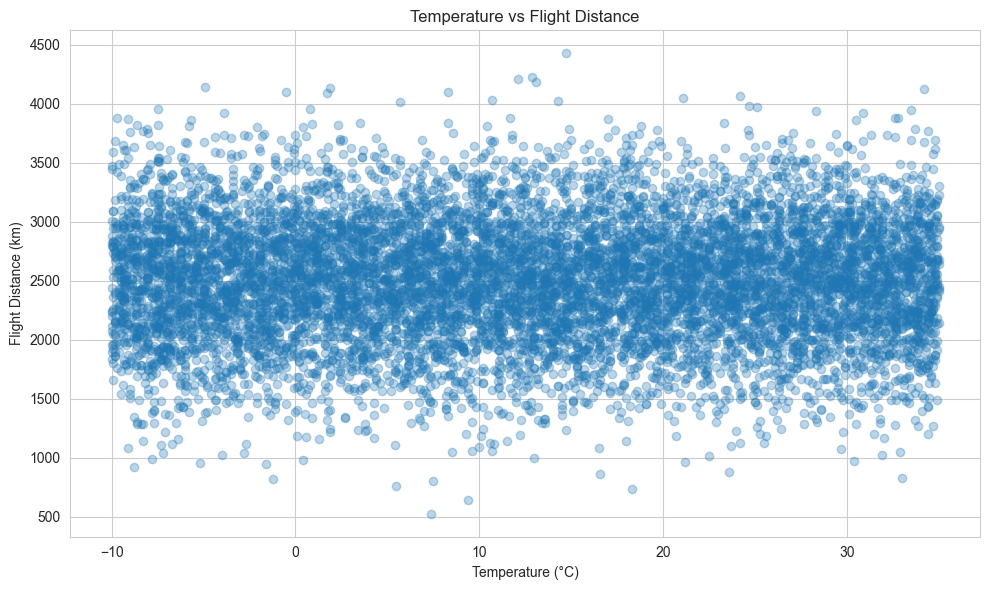

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
 


# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# ============================================================
# Q1: Migration routes across species/regions/seasons
# ============================================================

# First, let's see what species we have
print("Unique species:")
print(df_cleaned_result['Species'].value_counts())
print("\nUnique regions:")
print(df_cleaned_result['Region'].value_counts())

# ============================================================
# Q2: Temperature variation and migration intensity/seasonality
# ============================================================

# Create month mapping for proper ordering
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Temperature by migration start month
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Box plot: Temperature by start month
df_cleaned_result['Migration_Start_Month'] = pd.Categorical(df_cleaned_result['Migration_Start_Month'], 
                                               categories=month_order, 
                                               ordered=True)
df_sorted = df_cleaned_result.sort_values('Migration_Start_Month')
sns.boxplot(data=df_sorted, x='Migration_Start_Month', y='Temperature_C', ax=ax1)
ax1.set_title('Temperature Distribution by Migration Start Month')
ax1.set_xlabel('Month')
ax1.set_ylabel('Temperature (°C)')
ax1.tick_params(axis='x', rotation=45)

# Count of migrations by month (intensity)
migration_counts = df_cleaned_result['Migration_Start_Month'].value_counts().reindex(month_order)
ax2.bar(range(len(month_order)), migration_counts.values)
ax2.set_xticks(range(len(month_order)))
ax2.set_xticklabels(month_order, rotation=45)
ax2.set_title('Migration Intensity by Month (Q5)')
ax2.set_xlabel('Month')
ax2.set_ylabel('Number of Migrations')

plt.tight_layout()
plt.show()

# ============================================================
# Q3: Species by average flight distance
# ============================================================

# Calculate average distance per species
species_distance = df_cleaned_result.groupby('Species').agg({
    'Flight_Distance_km': ['mean', 'std', 'count']
}).round(2)
species_distance.columns = ['Avg_Distance_km', 'Std_Distance', 'Sample_Size']
species_distance = species_distance.sort_values('Avg_Distance_km', ascending=False)

print("\nQ3: Average Flight Distance by Species:")
print(species_distance)

# Visualize
plt.figure(figsize=(12, 6))
species_distance['Avg_Distance_km'].plot(kind='barh')
plt.title('Average Flight Distance by Species (Q3)')
plt.xlabel('Average Distance (km)')
plt.ylabel('Species')
plt.tight_layout()
plt.show()

# ============================================================
# Q4: Species by maximum altitude
# ============================================================

species_altitude = df_cleaned_result.groupby('Species').agg({
    'Max_Altitude_m': ['mean', 'max', 'min']
}).round(2)
species_altitude.columns = ['Avg_Max_Altitude', 'Highest_Altitude', 'Lowest_Max_Altitude']
species_altitude = species_altitude.sort_values('Avg_Max_Altitude', ascending=False)

print("\nQ4: Altitude Statistics by Species:")
print(species_altitude)

plt.figure(figsize=(12, 6))
species_altitude['Avg_Max_Altitude'].plot(kind='barh', color='skyblue')
plt.title('Average Maximum Altitude by Species (Q4)')
plt.xlabel('Average Maximum Altitude (m)')
plt.ylabel('Species')
plt.tight_layout()
plt.show()

# ============================================================
# Q5: Overall migration intensity throughout the year
# ============================================================

# You can also look at end months
end_month_counts = df_cleaned_result['Migration_End_Month'].value_counts().reindex(month_order)

plt.figure(figsize=(14, 6))
x = np.arange(len(month_order))
width = 0.35

plt.bar(x - width/2, migration_counts.values, width, label='Start Month', alpha=0.8)
plt.bar(x + width/2, end_month_counts.values, width, label='End Month', alpha=0.8)

plt.xlabel('Month')
plt.ylabel('Number of Migrations')
plt.title('Migration Intensity Throughout the Year (Q5)')
plt.xticks(x, month_order, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# ============================================================
# Bonus: Correlation analysis
# ============================================================

# Temperature vs Distance
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned_result['Temperature_C'], df_cleaned_result['Flight_Distance_km'], alpha=0.3)
plt.xlabel('Temperature (°C)')
plt.ylabel('Flight Distance (km)')
plt.title('Temperature vs Flight Distance')
plt.tight_layout()
plt.show()

In [37]:
# For geographic visualization, you'll need folium or plotly
# Here's a plotly example:

import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "iframe_connected"

# Sample a subset for clearer visualization
df_sample = df_cleaned_result.sample(n=100, random_state=42)

fig = go.Figure()

# Add migration routes as lines
for idx, row in df_sample.iterrows():
    fig.add_trace(go.Scattergeo(
        lon=[row['Start_Longitude'], row['End_Longitude']],
        lat=[row['Start_Latitude'], row['End_Latitude']],
        mode='lines',
        line=dict(width=1, color='blue'),
        opacity=0.3,
        showlegend=False
    ))

# Add start points
fig.add_trace(go.Scattergeo(
    lon=df_sample['Start_Longitude'],
    lat=df_sample['Start_Latitude'],
    mode='markers',
    marker=dict(size=4, color='green'),
    name='Start'
))

# Add end points
fig.add_trace(go.Scattergeo(
    lon=df_sample['End_Longitude'],
    lat=df_sample['End_Latitude'],
    mode='markers',
    marker=dict(size=4, color='red'),
    name='End'
))

fig.update_layout(
    title='Bird Migration Routes (Sample of 100)',
    geo=dict(
        projection_type='natural earth',
        showland=True,
        landcolor='rgb(243, 243, 243)',
        coastlinecolor='rgb(204, 204, 204)',
    ),
    height=600
)

fig.show(renderer="browser")